In [2]:
# Third-party packages
import h5py
import h5pyd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from scipy.interpolate import interp1d


from scipy.spatial import cKDTree
from tqdm.notebook import trange, tqdm

In [2]:
scenario_list = list(range(1,26))
scenario_paths = []
for s in scenario_list:
    fpath = '/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/V2 Work/SWITCH files/scenario_cost_files/scenario_'+str(s)+'_gen_build_cost_wave_offshore_wind.csv'
    scenario_paths.append(fpath)

d = {i: pd.read_csv(scenario_paths[i]) for i in range(len(scenario_paths))}

In [3]:
d[0][d[0]['index']==0]

,index,generation_project,build_year,gen_fixed_om,gen_overnight_cost
0,0,1400000000,2010,105400.0,3465000.00
1,0,1400000000,2011,105400.0,3465000.00
2,0,1400000000,2012,105400.0,3465000.00
3,0,1400000000,2013,105400.0,3465000.00
4,0,1400000000,2014,105400.0,3465000.00
5,0,1400000000,2015,105400.0,3465000.00
6,0,1400000000,2016,105400.0,3465000.00
7,0,1400000000,2017,105400.0,3465000.00
8,0,1400000000,2018,105400.0,3465000.00
9,0,1400000000,2019,105400.0,3465000.00


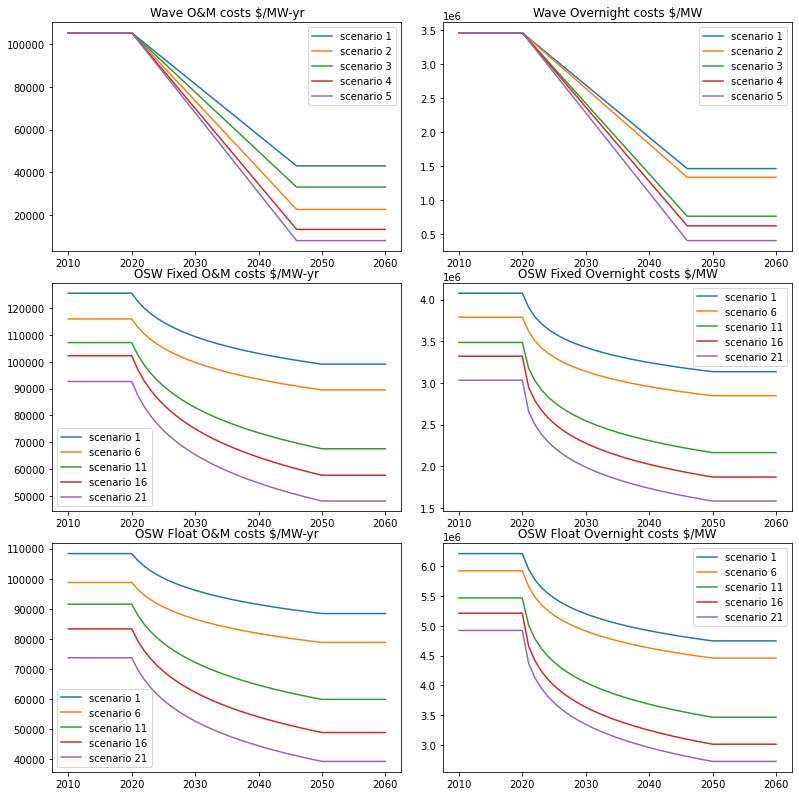

In [4]:
fig, axes = plt.subplots(3,2, figsize=(11,11))
fig.tight_layout()
axe = axes.ravel()
ax1 = axe[0]
ax2 = axe[1]
ax3 = axe[2]
ax4 = axe[3]
ax5 = axe[4]
ax6 = axe[5]

x1 = d[0][d[0]['index']==0]['build_year']
y1_1 = d[0][d[0]['index']==0]['gen_fixed_om']
y1_2 = d[1][d[1]['index']==0]['gen_fixed_om']
y1_3 = d[2][d[2]['index']==0]['gen_fixed_om']
y1_4 = d[3][d[3]['index']==0]['gen_fixed_om']
y1_5 = d[4][d[4]['index']==0]['gen_fixed_om']
y2_1 = d[0][d[0]['index']==0]['gen_overnight_cost']
y2_2 = d[1][d[1]['index']==0]['gen_overnight_cost']
y2_3 = d[2][d[2]['index']==0]['gen_overnight_cost']
y2_4 = d[3][d[3]['index']==0]['gen_overnight_cost']
y2_5 = d[4][d[4]['index']==0]['gen_overnight_cost']
ax1.plot(x1,y1_1);
ax1.plot(x1,y1_2);
ax1.plot(x1,y1_3);
ax1.plot(x1,y1_4);
ax1.plot(x1,y1_5);

ax2.plot(x1,y2_1);
ax2.plot(x1,y2_2);
ax2.plot(x1,y2_3);
ax2.plot(x1,y2_4);
ax2.plot(x1,y2_5);

ax1.legend(['scenario 1','scenario 2','scenario 3','scenario 4','scenario 5'])
ax2.legend(['scenario 1','scenario 2','scenario 3','scenario 4','scenario 5'])

ax1.title.set_text('Wave O&M costs $/MW-yr')
ax2.title.set_text('Wave Overnight costs $/MW')

x2 = d[0][d[0]['index']==101]['build_year'] #scenario 1
y3_1 = d[0][d[0]['index']==101]['gen_fixed_om'] #scenario 6
y3_2 = d[5][d[5]['index']==101]['gen_fixed_om']
y3_3 = d[10][d[10]['index']==101]['gen_fixed_om']
y3_4 = d[15][d[15]['index']==101]['gen_fixed_om']
y3_5 = d[20][d[20]['index']==101]['gen_fixed_om']
y4_1 = d[0][d[0]['index']==101]['gen_overnight_cost']
y4_2 = d[5][d[5]['index']==101]['gen_overnight_cost']
y4_3 = d[10][d[10]['index']==101]['gen_overnight_cost']
y4_4 = d[15][d[15]['index']==101]['gen_overnight_cost']
y4_5 = d[20][d[20]['index']==101]['gen_overnight_cost']
ax3.plot(x2,y3_1);
ax3.plot(x2,y3_2);
ax3.plot(x2,y3_3);
ax3.plot(x2,y3_4);
ax3.plot(x2,y3_5);
ax4.plot(x2,y4_1);
ax4.plot(x2,y4_2);
ax4.plot(x2,y4_3);
ax4.plot(x2,y4_4);
ax4.plot(x2,y4_5);

ax3.legend(['scenario 1','scenario 6','scenario 11','scenario 16','scenario 21'])
ax4.legend(['scenario 1','scenario 6','scenario 11','scenario 16','scenario 21'])

ax3.title.set_text('OSW Fixed O&M costs $/MW-yr')
ax4.title.set_text('OSW Fixed Overnight costs $/MW')

x3 = d[0][d[0]['index']==102]['build_year'] #scenario 1
y4_1 = d[0][d[0]['index']==102]['gen_fixed_om'] #scenario 6
y4_2 = d[5][d[5]['index']==102]['gen_fixed_om']
y4_3 = d[10][d[10]['index']==102]['gen_fixed_om']
y4_4 = d[15][d[15]['index']==102]['gen_fixed_om']
y4_5 = d[20][d[20]['index']==102]['gen_fixed_om']
y5_1 = d[0][d[0]['index']==102]['gen_overnight_cost']
y5_2 = d[5][d[5]['index']==102]['gen_overnight_cost']
y5_3 = d[10][d[10]['index']==102]['gen_overnight_cost']
y5_4 = d[15][d[15]['index']==102]['gen_overnight_cost']
y5_5 = d[20][d[20]['index']==102]['gen_overnight_cost']
ax5.plot(x3,y4_1);
ax5.plot(x3,y4_2);
ax5.plot(x3,y4_3);
ax5.plot(x3,y4_4);
ax5.plot(x3,y4_5);
ax6.plot(x3,y5_1);
ax6.plot(x3,y5_2);
ax6.plot(x3,y5_3);
ax6.plot(x3,y5_4);
ax6.plot(x3,y5_5);

ax5.legend(['scenario 1','scenario 6','scenario 11','scenario 16','scenario 21'])
ax6.legend(['scenario 1','scenario 6','scenario 11','scenario 16','scenario 21'])

ax5.title.set_text('OSW Float O&M costs $/MW-yr')
ax6.title.set_text('OSW Float Overnight costs $/MW')


In [6]:
scenario_ids = list(range(0,25))
for sid in scenario_ids:
    d[sid]['scenario_id'] = sid+1

In [8]:
d[24]

,index,generation_project,build_year,gen_fixed_om,gen_overnight_cost,scenario_id
0,0,1400000000,2010,105400.000,3465000.00,25
1,0,1400000000,2011,105400.000,3465000.00,25
2,0,1400000000,2012,105400.000,3465000.00,25
3,0,1400000000,2013,105400.000,3465000.00,25
4,0,1400000000,2014,105400.000,3465000.00,25
...,...,...,...,...,...,...
10297,201,1400000201,2056,39253.484,2728300.17,25
10298,201,1400000201,2057,39253.484,2728300.17,25
10299,201,1400000201,2058,39253.484,2728300.17,25
10300,201,1400000201,2059,39253.484,2728300.17,25


In [14]:
51*202*25

257550

In [9]:
all_scenarios = pd.concat(d.values(), ignore_index=True)
all_scenarios

,index,generation_project,build_year,gen_fixed_om,gen_overnight_cost,scenario_id
0,0,1400000000,2010,105400.000,3465000.00,1
1,0,1400000000,2011,105400.000,3465000.00,1
2,0,1400000000,2012,105400.000,3465000.00,1
3,0,1400000000,2013,105400.000,3465000.00,1
4,0,1400000000,2014,105400.000,3465000.00,1
...,...,...,...,...,...,...
257545,201,1400000201,2056,39253.484,2728300.17,25
257546,201,1400000201,2057,39253.484,2728300.17,25
257547,201,1400000201,2058,39253.484,2728300.17,25
257548,201,1400000201,2059,39253.484,2728300.17,25


In [15]:
fpath = '/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/V2 Work/SWITCH files/scenario_cost_files/all_scenarios_gen_build_cost_wave_offshore_wind.csv'
all_scenarios.to_csv(fpath, index=False)

In [13]:
path = '/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/V2 Work/SWITCH files/nati_offshore_wind_colocation_cf_v2.csv'
osw_cf = pd.read_csv(path)
osw_cf

,generation_project,gen_max_capacity_factor,site,year,month,day,hour
0,1400000101,0.792742,1,2006,1,1,0
1,1400000101,0.924306,1,2006,1,1,1
2,1400000101,0.536871,1,2006,1,1,2
3,1400000101,0.648541,1,2006,1,1,3
4,1400000101,0.562322,1,2006,1,1,4
...,...,...,...,...,...,...,...
884755,1400000201,0.497244,101,2006,12,31,19
884756,1400000201,0.502999,101,2006,12,31,20
884757,1400000201,0.585540,101,2006,12,31,21
884758,1400000201,0.811253,101,2006,12,31,22


In [14]:
osw_cf['month'] = osw_cf['month'].astype(str)
osw_cf['month'] = osw_cf['month'].str.zfill(2)
osw_cf['day'] = osw_cf['day'].astype(str)
osw_cf['day'] = osw_cf['day'].str.zfill(2)
osw_cf['hour'] = osw_cf['hour'].astype(str)
osw_cf['hour'] = osw_cf['hour'].str.zfill(2)
osw_cf

,generation_project,gen_max_capacity_factor,site,year,month,day,hour
0,1400000101,0.792742,1,2006,01,01,00
1,1400000101,0.924306,1,2006,01,01,01
2,1400000101,0.536871,1,2006,01,01,02
3,1400000101,0.648541,1,2006,01,01,03
4,1400000101,0.562322,1,2006,01,01,04
...,...,...,...,...,...,...,...
884755,1400000201,0.497244,101,2006,12,31,19
884756,1400000201,0.502999,101,2006,12,31,20
884757,1400000201,0.585540,101,2006,12,31,21
884758,1400000201,0.811253,101,2006,12,31,22


In [15]:
path = '/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/V2 Work/SWITCH files/nati_wave_colocation_cf_v2.csv'
wave_cf = pd.read_csv(path)
wave_cf

,generation_project,gen_max_capacity_factor,site,year,month,day,hour
0,1400000000,0.594093,1,2006,1,1,0
1,1400000000,0.610109,1,2006,1,1,1
2,1400000000,0.626125,1,2006,1,1,2
3,1400000000,0.642141,1,2006,1,1,3
4,1400000000,0.655864,1,2006,1,1,4
...,...,...,...,...,...,...,...
884755,1400000100,0.520220,101,2006,12,31,19
884756,1400000100,0.507486,101,2006,12,31,20
884757,1400000100,0.494751,101,2006,12,31,21
884758,1400000100,0.494751,101,2006,12,31,22


In [16]:
wave_cf['month'] = wave_cf['month'].astype(str)
wave_cf['month'] = wave_cf['month'].str.zfill(2)
wave_cf['day'] = wave_cf['day'].astype(str)
wave_cf['day'] = wave_cf['day'].str.zfill(2)
wave_cf['hour'] = wave_cf['hour'].astype(str)
wave_cf['hour'] = wave_cf['hour'].str.zfill(2)
wave_cf

,generation_project,gen_max_capacity_factor,site,year,month,day,hour
0,1400000000,0.594093,1,2006,01,01,00
1,1400000000,0.610109,1,2006,01,01,01
2,1400000000,0.626125,1,2006,01,01,02
3,1400000000,0.642141,1,2006,01,01,03
4,1400000000,0.655864,1,2006,01,01,04
...,...,...,...,...,...,...,...
884755,1400000100,0.520220,101,2006,12,31,19
884756,1400000100,0.507486,101,2006,12,31,20
884757,1400000100,0.494751,101,2006,12,31,21
884758,1400000100,0.494751,101,2006,12,31,22


In [20]:
fpath = '/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/V2 Work/SWITCH files/nati_offshore_wind_colocation_cf_v2.csv'
osw_cf.to_csv(fpath, index=False)

In [21]:
fpath = '/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/V2 Work/SWITCH files/nati_wave_colocation_cf_v2.csv'
wave_cf.to_csv(fpath, index=False)